# Домашнее задание

В этом домашнем задании вам предстоит обучить модель классификации рукописных цифр на Tensorflow.

Важным дополнительным требованием будет сохранение чекпоинтов на ваш гугл диск (не переживайтеЖ ниже будут подсказки, как это сделать). Это пригодится вам в дальнейшем при обучении более сложных моделей, на случай потери данных при неожиданном отключении Colab.

In [1]:
import tensorflow as tf
print(tf.__version__)
from google.colab import drive
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

 #tf.enable_eager_execution()

2.12.0


####Вспомогательный код

In [2]:
#@title
def show_mnist(images, labels, predicted_labels=None):
    plt.figure(figsize=(10,10))
    for i in range(16):
        plt.subplot(4,4, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.gray)
        if predicted_labels is not None:
            title_obj = plt.title(f"Real: {labels[i]}. Pred: {predicted_labels[i]}")
            if labels[i] != predicted_labels[i]:
                plt.setp(title_obj, color='r')
        else:
            plt.title(f"Real label: {labels[i]}")

def show_progress(history: dict):
    plt.figure(figsize=(10, 5))
    ax1 = plt.subplot(1,2,1)
    plt.plot(history["acc"],label='train accuracy')
    plt.plot(history["val_acc"], label='test accuracy')
    ax2 = plt.subplot(1,2,2)
    plt.plot(history["loss"],label='train_loss')
    plt.plot(history["val_loss"],label='test_loss')

    ax1.legend(loc='best')
    ax2.legend(loc='best')
    plt.grid()
    plt.tight_layout()
    plt.show()

## Загрузка данных

11490434/11490434 [==============================] - 0s 0us/step


(60000, 784)

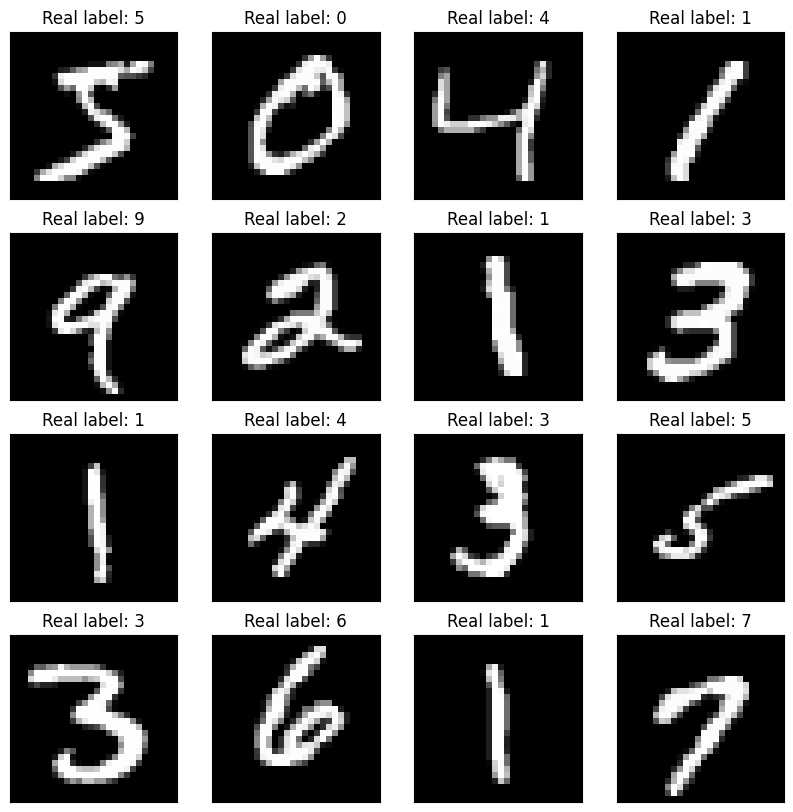

In [3]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

show_mnist(x_train, y_train)
x_train = x_train.reshape((-1, 28*28)) # вытянули каждую картинку в вектор
x_test = x_test.reshape((-1, 28*28))
x_train.shape

In [4]:
# прикрепим ваш гугл диск к виртуальной машине
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
# Путь до вашего гугл диска скорее всего выглядит так: /content/drive/My Drive/
# если эта клетка вызывает ошибку,
# измените путь согласно ! ls "/content/drive/"

path = Path("/content/drive/My Drive/Skillbox/model_1")
path.mkdir(exist_ok=True, parents=True) # папка создается на вашем гугл диске. вместе с "родителями"
assert path.exists()
cpt_filename = "best_checkpoint.hdf5"
cpt_path =str(path / cpt_filename)
# После выполнения этой клетки, в вашем гугл диске должна создаться папка: Skillbox/model_1
# убедитесь в этом

А весь код ниже вы реализуете самостоятельно! Вы уже к этому готовы :)
Требования к модели:
1. Точность на тестовой части выборки >96%
2. Чекпоинт модели с лучшими параметрами должен быть сохранен у вас на гугл диске
3. Объект history, который получается из model.fit(...) должен содержать значения лосса и accuracy для трейна и теста

In [13]:
# < YOUR CODE STARTS HERE >

input_layer = tf.keras.Input(shape = (784,), name  = 'InputLayer')

Dense_1 = tf.keras.layers.Dense(128, name = 'Dense1', activation='relu')(input_layer)

Dense_2 = tf.keras.layers.Dense(64, activation='relu', name = 'Dense2')(Dense_1)

output_layer = tf.keras.layers.Dense(10, name = 'OutputLayer', activation='softmax')(Dense_2)


model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

optim = tf.keras.optimizers.Adam(learning_rate=0.001)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False)

model.compile(loss = loss, optimizer = optim, metrics='acc')

checkpoint = tf.keras.callbacks.ModelCheckpoint(cpt_path, save_best_only = True, monitor = 'val_acc', mode='max', verbose = 1)

history = model.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), epochs=10, batch_size=32, callbacks=[checkpoint])


# < YOUR CODE ENDS HERE >

Epoch 1/10
1859/1875 [============================>.] - ETA: 0s - loss: 0.2398 - acc: 0.9301
Epoch 1: val_acc improved from -inf to 0.95940, saving model to /content/drive/My Drive/Skillbox/model_1/best_checkpoint.hdf5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2389 - acc: 0.9304 - val_loss: 0.1317 - val_acc: 0.9594
Epoch 2/10
1870/1875 [============================>.] - ETA: 0s - loss: 0.1045 - acc: 0.9679
Epoch 2: val_acc improved from 0.95940 to 0.97160, saving model to /content/drive/My Drive/Skillbox/model_1/best_checkpoint.hdf5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1044 - acc: 0.9680 - val_loss: 0.0899 - val_acc: 0.9716
Epoch 3/10
1867/1875 [============================>.] - ETA: 0s - loss: 0.0741 - acc: 0.9767
Epoch 3: val_acc did not improve from 0.97160
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0740 - acc: 0.9768 - val_loss: 0.0925 - val_acc: 0.9714
Epoch 4/10
1873/1875 [============================>

In [14]:
assert len(list(path.glob("*"))) != 0, f"Checkpoint dir {path}"
assert "acc" in history.history, "History object must contain Accuracy. Please, retrain with this metric"
assert "val_acc" in history.history, "Please, provide validation_data in model.fit."
assert np.max(history.history["val_acc"]) > 0.95, "Validation accuracy must be more than 0.95"
# Для старой версии (tf.__version__ == 1.x) запустить aseert-ы ниже:
# assert "acc" in history.history, "History object must contain Accuracy. Please, retrain with this metric"
# assert "val_acc" in history.history, "Please, provide validation_data in model.fit."
# assert np.max(history.history["val_acc"]) > 0.95, "Validation accuracy must be more than 0.95"
print("Training tests passed")

Training tests passed


Давайте посмотрим на графики обучения:

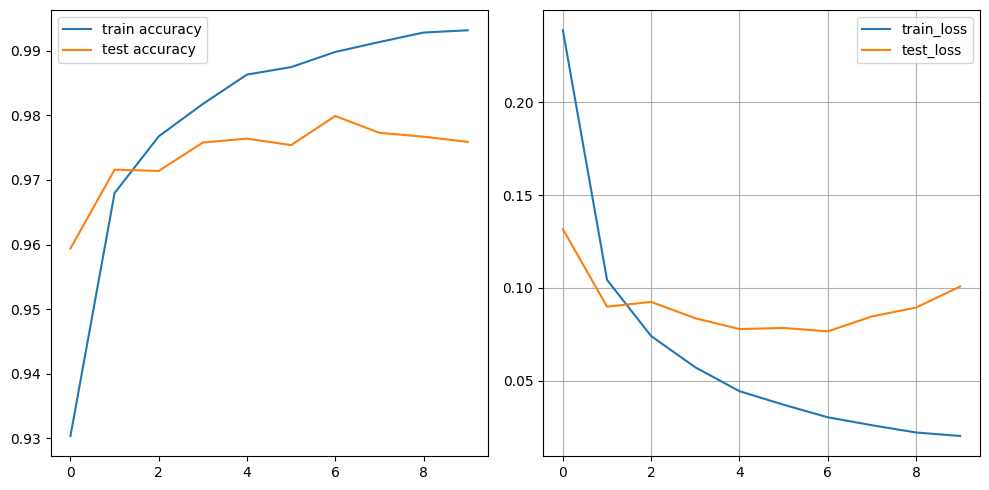

In [15]:
show_progress(history.history)

А теперь перейдем к загрузке модели. Если все реализовано правильно, то код ниже должен сработать без ошибок:

In [16]:
restored_model = tf.keras.models.load_model(cpt_path)
loss, acc = restored_model.evaluate(x_test, y_test)
print(f"Accuracy of restored model {acc*100 :.2f}%")
assert acc > 0.96

313/313 [==============================] - 1s 3ms/step - loss: 0.0766 - acc: 0.9799
Accuracy of restored model 97.99%


И, наконец, можно сравнить предсказания с реальными классами (с такой точностью найти ошибку будет сложно):

313/313 [==============================] - 0s 1ms/step


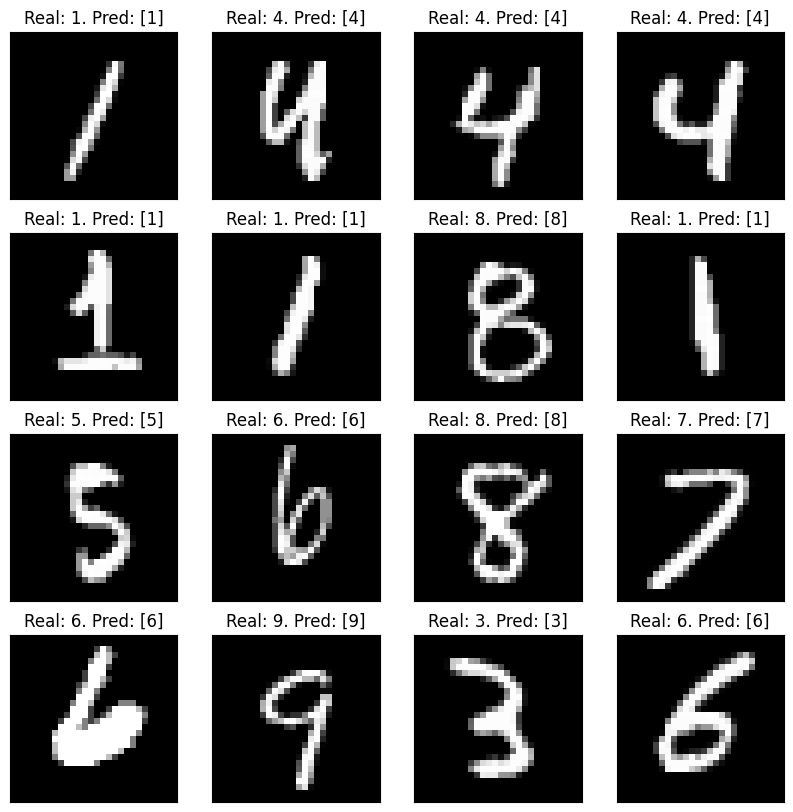

In [40]:
predicted_probability = restored_model.predict(x_test)
predicted_labels = [0]*len(predicted_probability)

for i in range(len(predicted_probability)):
    predicted_labels[i] = [list(predicted_probability[i]).index(max(predicted_probability[i]))]

predicted_labels=np.array(predicted_labels)

idxs = np.random.choice(np.arange(len(x_test)), 16, replace=False)
show_mnist(x_test[idxs].reshape((-1, 28, 28)), y_test[idxs], predicted_labels[idxs])